# Pymaceuticals Inc.
---

### Analysis

Ten drugs were tested for their tumor volume-reducing efficacy in mice. Mice were treated for up to 45 days and tumor volumes were measured at each time point. Of the drugs tested, Capomulin and Ramicane yielded the most promising results. Compared to other drugs, mice treated with Capomulin and Ramicane had the smallest tumors at the time of culling. Interestingly, the average tumor volume in mice treated with Capomulin increased until day 20, thereafter tumor volumes decreased substantially. These data suggest that Capomulin's mechanism of action is delayed. Future research that sheds light on this delay could pave the way for new cancer therapeutics and further elucidate the cellular pathways that contribute to carcinogenesis. 

-- Samuel Palframan, July 2023. 

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, how='left', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [49]:
# Check for number of mice.
merged_df['Mouse ID'].nunique()

249

In [50]:
# Not required: List unique mice
merged_df['Mouse ID'].unique()

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'g989', 'z314', 'o848', 'v719', 'q597',
      

In [51]:
# Check for duplicate rows
merged_df['Mouse ID'].value_counts()

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [52]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mouse_timepoint = merged_df.loc[:, ['Mouse ID', 'Timepoint']]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_timepoint[mouse_timepoint.duplicated()]

,Mouse ID,Timepoint
137,g989,0
360,g989,5
681,g989,10
869,g989,15
1111,g989,20


In [53]:
# Optonal: Get all the data for the duplicate mouse ID. 
duplicate_mouse = merged_df.loc[merged_df["Mouse ID"] == 'g989']
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [54]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.loc[merged_df["Mouse ID"] != 'g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#Set Drug Regimen as Index
drug_regimen = clean_df.set_index(['Drug Regimen'])#['Tumor Volume (mm3)']
#Find mean of Tumor Volume
tv_mean = drug_regimen.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
#Find median of Tumor Volume
tv_median = drug_regimen.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
#Find variance of Tumor Volume
tv_var = drug_regimen.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
#Find Std. Dev. of Tumor Volume
tv_std = drug_regimen.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
#Find SEM of Tumor Volume
tv_sem = drug_regimen.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

#Create Tumor Volume Summary Statistics Table
summary_table_df = pd.DataFrame({"Mean Tumor Volume": tv_mean,
                                 "Median Tumor Volume": tv_median,
                                 "Tumor Volume Variance": tv_var,
                                 "Tumor Volume Std. Dev.": tv_std,
                                 "Tumor Volume Std. Err.": tv_sem})

#Display Table
summary_table_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [56]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Using Aggregate Function to apply Summary Statistics by Column Name
drug_agg_stats = clean_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': \
                                                        ['mean', 'median', 'var', 'std', 'sem']})
drug_agg_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [57]:
# Generate Groupby series of Drug Regime and Timpoint
# Count the number of rows in Timepoint and sort by greatest to smallest
drug_by_timepoints = clean_df.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)
drug_by_timepoints


#Note: reset_index() changes a groupby() series into DataFrame (see below):
##drug_by_timepoints_reset_index = drug_by_timepoints.reset_index()
##drug_by_timepoints_reset_index

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64

Text(0, 0.5, '# of Observed Mouse Timepoints')

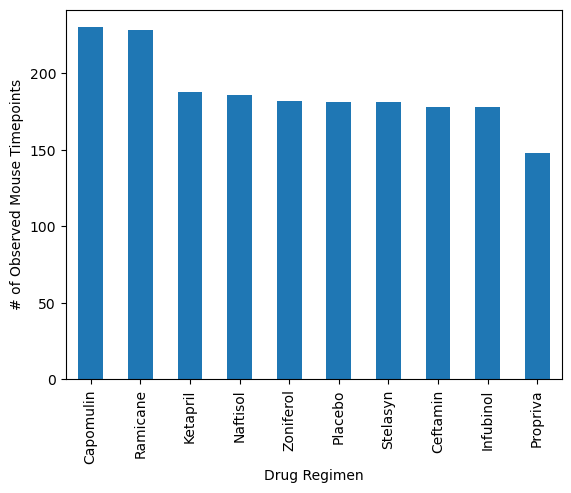

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_timepoints_plot = drug_by_timepoints.plot.bar()
drug_timepoints_plot.set_ylabel("# of Observed Mouse Timepoints")


Text(0, 0.5, '# of Observed Mouse Timepoints')

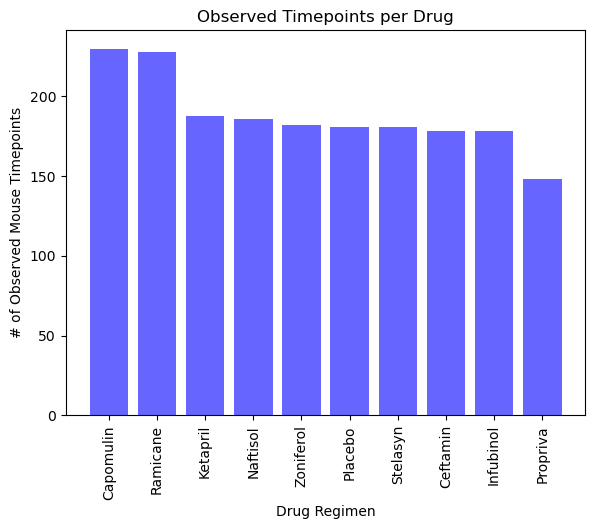

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#Set x-axis and tick locations
x_axis = np.arange(len(drug_by_timepoints))
tick_locations = [value for value in x_axis]

#Plot bar graph for Drug Regimen and # of Timepoints
plt.figure(figsize=(6.7,5))
plt.bar(x_axis, drug_by_timepoints, color='blue', alpha=0.6, align="center")
plt.xticks(tick_locations, drug_by_timepoints.index, rotation="vertical")

#Set title and labels
plt.title("Observed Timepoints per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

In [60]:
# Generate series containing number of male and female mice using value_counts()
gender_grouped = clean_df['Sex'].value_counts()
gender_grouped
gender_grouped

Male      958
Female    922
Name: Sex, dtype: int64

array([<Axes: ylabel='Sex'>], dtype=object)

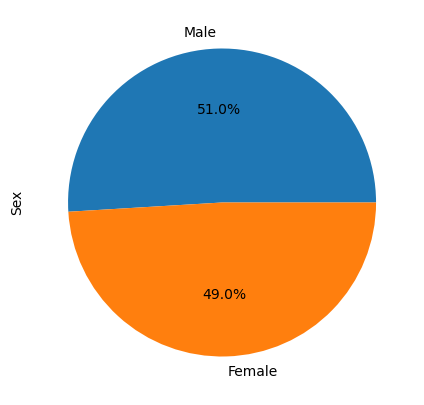

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_grouped.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(5, 5))

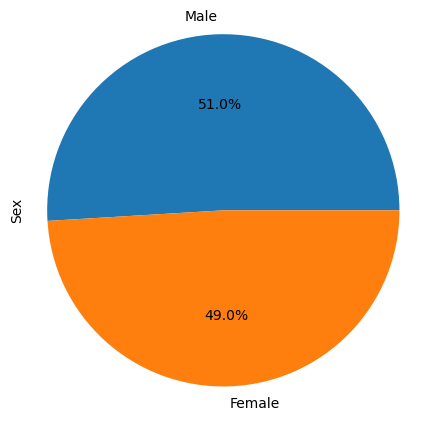

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(5,5))
plt.pie(gender_grouped, labels=gender_grouped.index, autopct="%1.1f%%")

# Create axes which are equal and label y-axis
plt.axis("equal")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [62]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [18]:
#Groupby Mouse ID and max timepoint
group_mouse_max = clean_df.groupby('Mouse ID')['Timepoint'].max()

#Merge the two DataFrames
final_timepoint_merged = pd.merge(group_mouse_max, clean_df, how='left', on=['Mouse ID', 'Timepoint'])
final_timepoint_merged


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [63]:
# Create Drug List (all Drugs)
drug_lst = list(final_timepoint_merged['Drug Regimen'].unique())

#Create most promising Drug List
best_drug_lst = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

drug_lst


['Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ramicane',
 'Ketapril',
 'Propriva',
 'Naftisol',
 'Capomulin']

In [64]:
#Create empty List for Tumor Volume by Drug
tumor_vol_by_drug = []

#Loop through Final Timepoint DataFrame to create Tumor Volume List
for drug in best_drug_lst:
    tumor_vol = final_timepoint_merged.loc[final_timepoint_merged['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_vol_by_drug.append(tumor_vol)
#tumor_vol_by_drug

In [65]:
#Create Dictionary with labelled Keys from List Containing Tumor Volume by Drug for Plotting
drug_tumor_volumes = {}
for x in range(len(tumor_vol_by_drug)):
    drug_tumor_volumes[best_drug_lst[x].format(x)] = tumor_vol_by_drug[x]
#drug_tumor_volumes

In [66]:
#Create Dictionary containing the first and third quartiles (positions [0] and [1]) 
#and IQR of each Drug (position[2])
drug_quartiles_iqr = {}
for x in range(len(tumor_vol_by_drug)):
    q1, q3 = np.percentile(tumor_vol_by_drug[x], [25, 75])
    drug_quartiles_iqr[best_drug_lst[x].format(x)] = q1, q3, (q3 - q1)

drug_quartiles_iqr

{'Capomulin': (32.37735684, 40.1592203, 7.781863460000004),
 'Ramicane': (31.56046955, 40.65900627, 9.098536719999998),
 'Infubinol': (54.04860769, 65.52574285, 11.477135160000003),
 'Ceftamin': (48.72207785, 64.29983003, 15.577752179999997)}

In [67]:
#Create Dictionary containing the lower and upper bounds (positions [0] and [1]) for each drug
upper_lower_bounds = {}
for x in range(len(tumor_vol_by_drug)):
    lower_bound = (drug_quartiles_iqr[best_drug_lst[x]][0] - (1.5*drug_quartiles_iqr[best_drug_lst[x]][2])) 
    upper_bound = (drug_quartiles_iqr[best_drug_lst[x]][1] + (1.5*drug_quartiles_iqr[best_drug_lst[x]][2]))
    upper_lower_bounds[best_drug_lst[x].format(x)] = lower_bound, upper_bound

upper_lower_bounds

{'Capomulin': (20.70456164999999, 51.83201549),
 'Ramicane': (17.912664470000003, 54.30681135),
 'Infubinol': (36.83290494999999, 82.74144559000001),
 'Ceftamin': (25.355449580000002, 87.66645829999999)}

In [69]:
#Create Dictionary containing Tumor Volume Outliers for Drug
outlier_dict = {}
for x in range(len(best_drug_lst)):
    temp_df =  final_timepoint_merged.loc[final_timepoint_merged['Drug Regimen'] == best_drug_lst[x]]
    temp_outliers = temp_df.loc[(temp_df['Tumor Volume (mm3)'] < upper_lower_bounds[best_drug_lst[x]][0]) | \
                                      (temp_df['Tumor Volume (mm3)'] > upper_lower_bounds[best_drug_lst[x]][1])]
    outlier_dict[best_drug_lst[x].format(x)] = temp_outliers['Tumor Volume (mm3)']

outlier_dict

{'Capomulin': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Ramicane': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Infubinol': 31    36.321346
 Name: Tumor Volume (mm3), dtype: float64,
 'Ceftamin': Series([], Name: Tumor Volume (mm3), dtype: float64)}

In [70]:
#Statistical Summary (IQR & Outliers) of Final Tumor Volume per Drug
print("FINAL TUMOR VOLUME SUMMARY")
print("--------------------------")
for x in range(len(best_drug_lst)):
    print(f"{best_drug_lst[x]}:\
    IQR = {drug_quartiles_iqr[best_drug_lst[x]][2]}\
    Outlier(s): {outlier_dict[best_drug_lst[x]].tolist()}\n")

FINAL TUMOR VOLUME SUMMARY
--------------------------
Capomulin:    IQR = 7.781863460000004    Outlier(s): []

Ramicane:    IQR = 9.098536719999998    Outlier(s): []

Infubinol:    IQR = 11.477135160000003    Outlier(s): [36.3213458]

Ceftamin:    IQR = 15.577752179999997    Outlier(s): []



Text(0, 0.5, 'Tumor Volume (mm3)')

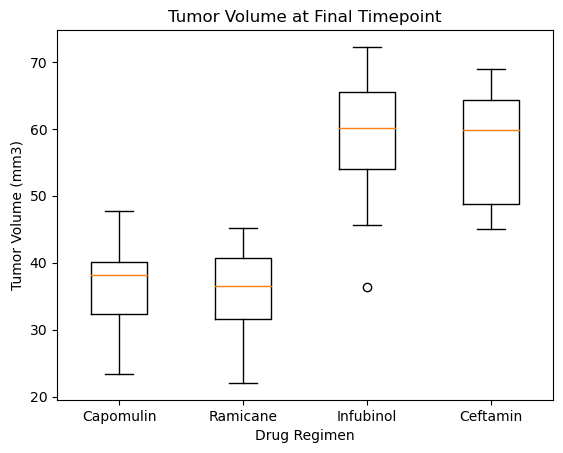

In [71]:
#BoxPlot of Tumor Volumes by Drug at Final Timepoint
fig, ax = plt.subplots()
ax.boxplot(drug_tumor_volumes.values())
ax.set_xticklabels(drug_tumor_volumes.keys())

#Set title and labels
plt.title("Tumor Volume at Final Timepoint")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")

## Line and Scatter Plots

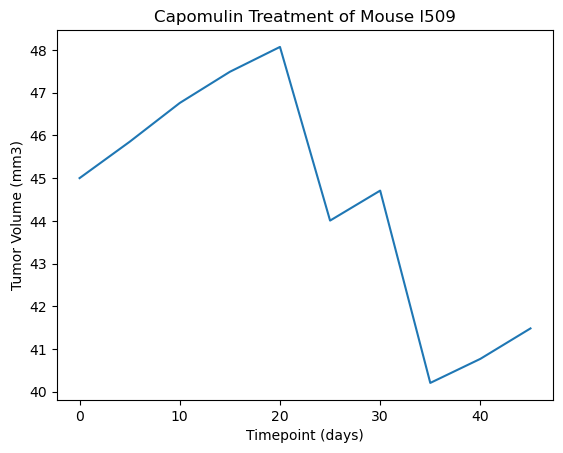

In [72]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#Filter clean_df by Mouse ID of interest
single_mouse_df = clean_df.loc[clean_df['Mouse ID'] == "l509"]

#Plot Line graph of Tumor Volume of Mouse 'l509' over time
plt.plot(single_mouse_df['Timepoint'], single_mouse_df["Tumor Volume (mm3)"])

#Give title and label x and y axes
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

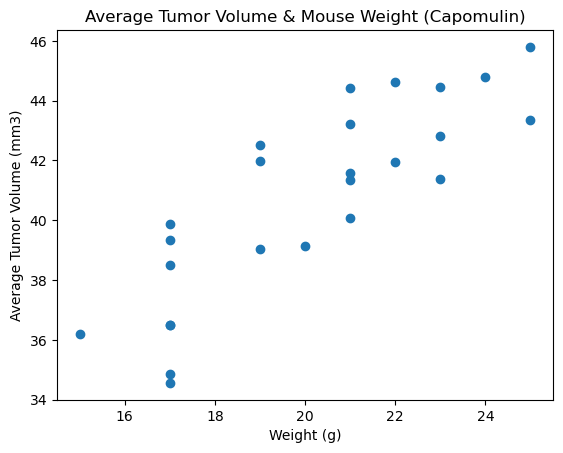

In [73]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Filter data by Capomulin Drug
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]

#Group data by Mouse ID and get mean of Weight and Tumor Volume (mm3)
grouped_capomulin_df = capomulin_df.groupby(['Mouse ID'])[['Weight (g)','Tumor Volume (mm3)']].mean().reset_index()
grouped_capomulin_df

#Plot scatter plot
x_axis = grouped_capomulin_df['Weight (g)']
y_axis = grouped_capomulin_df['Tumor Volume (mm3)']
plt.scatter(x_axis, y_axis, marker="o")

#Give title and label x and y axes
plt.title('Average Tumor Volume & Mouse Weight (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

#grouped_capomulin_df


## Correlation and Regression

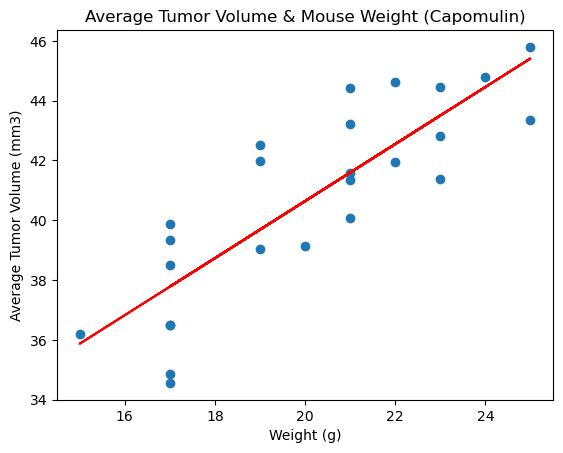

The correlation coefficient of weight and average tumor volume is 0.84.


In [78]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = grouped_capomulin_df['Weight (g)']
y_values = grouped_capomulin_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Give title and label x and y axes
plt.title('Average Tumor Volume & Mouse Weight (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f'The correlation coefficient of weight and average tumor volume is {round(rvalue, 2)}.')